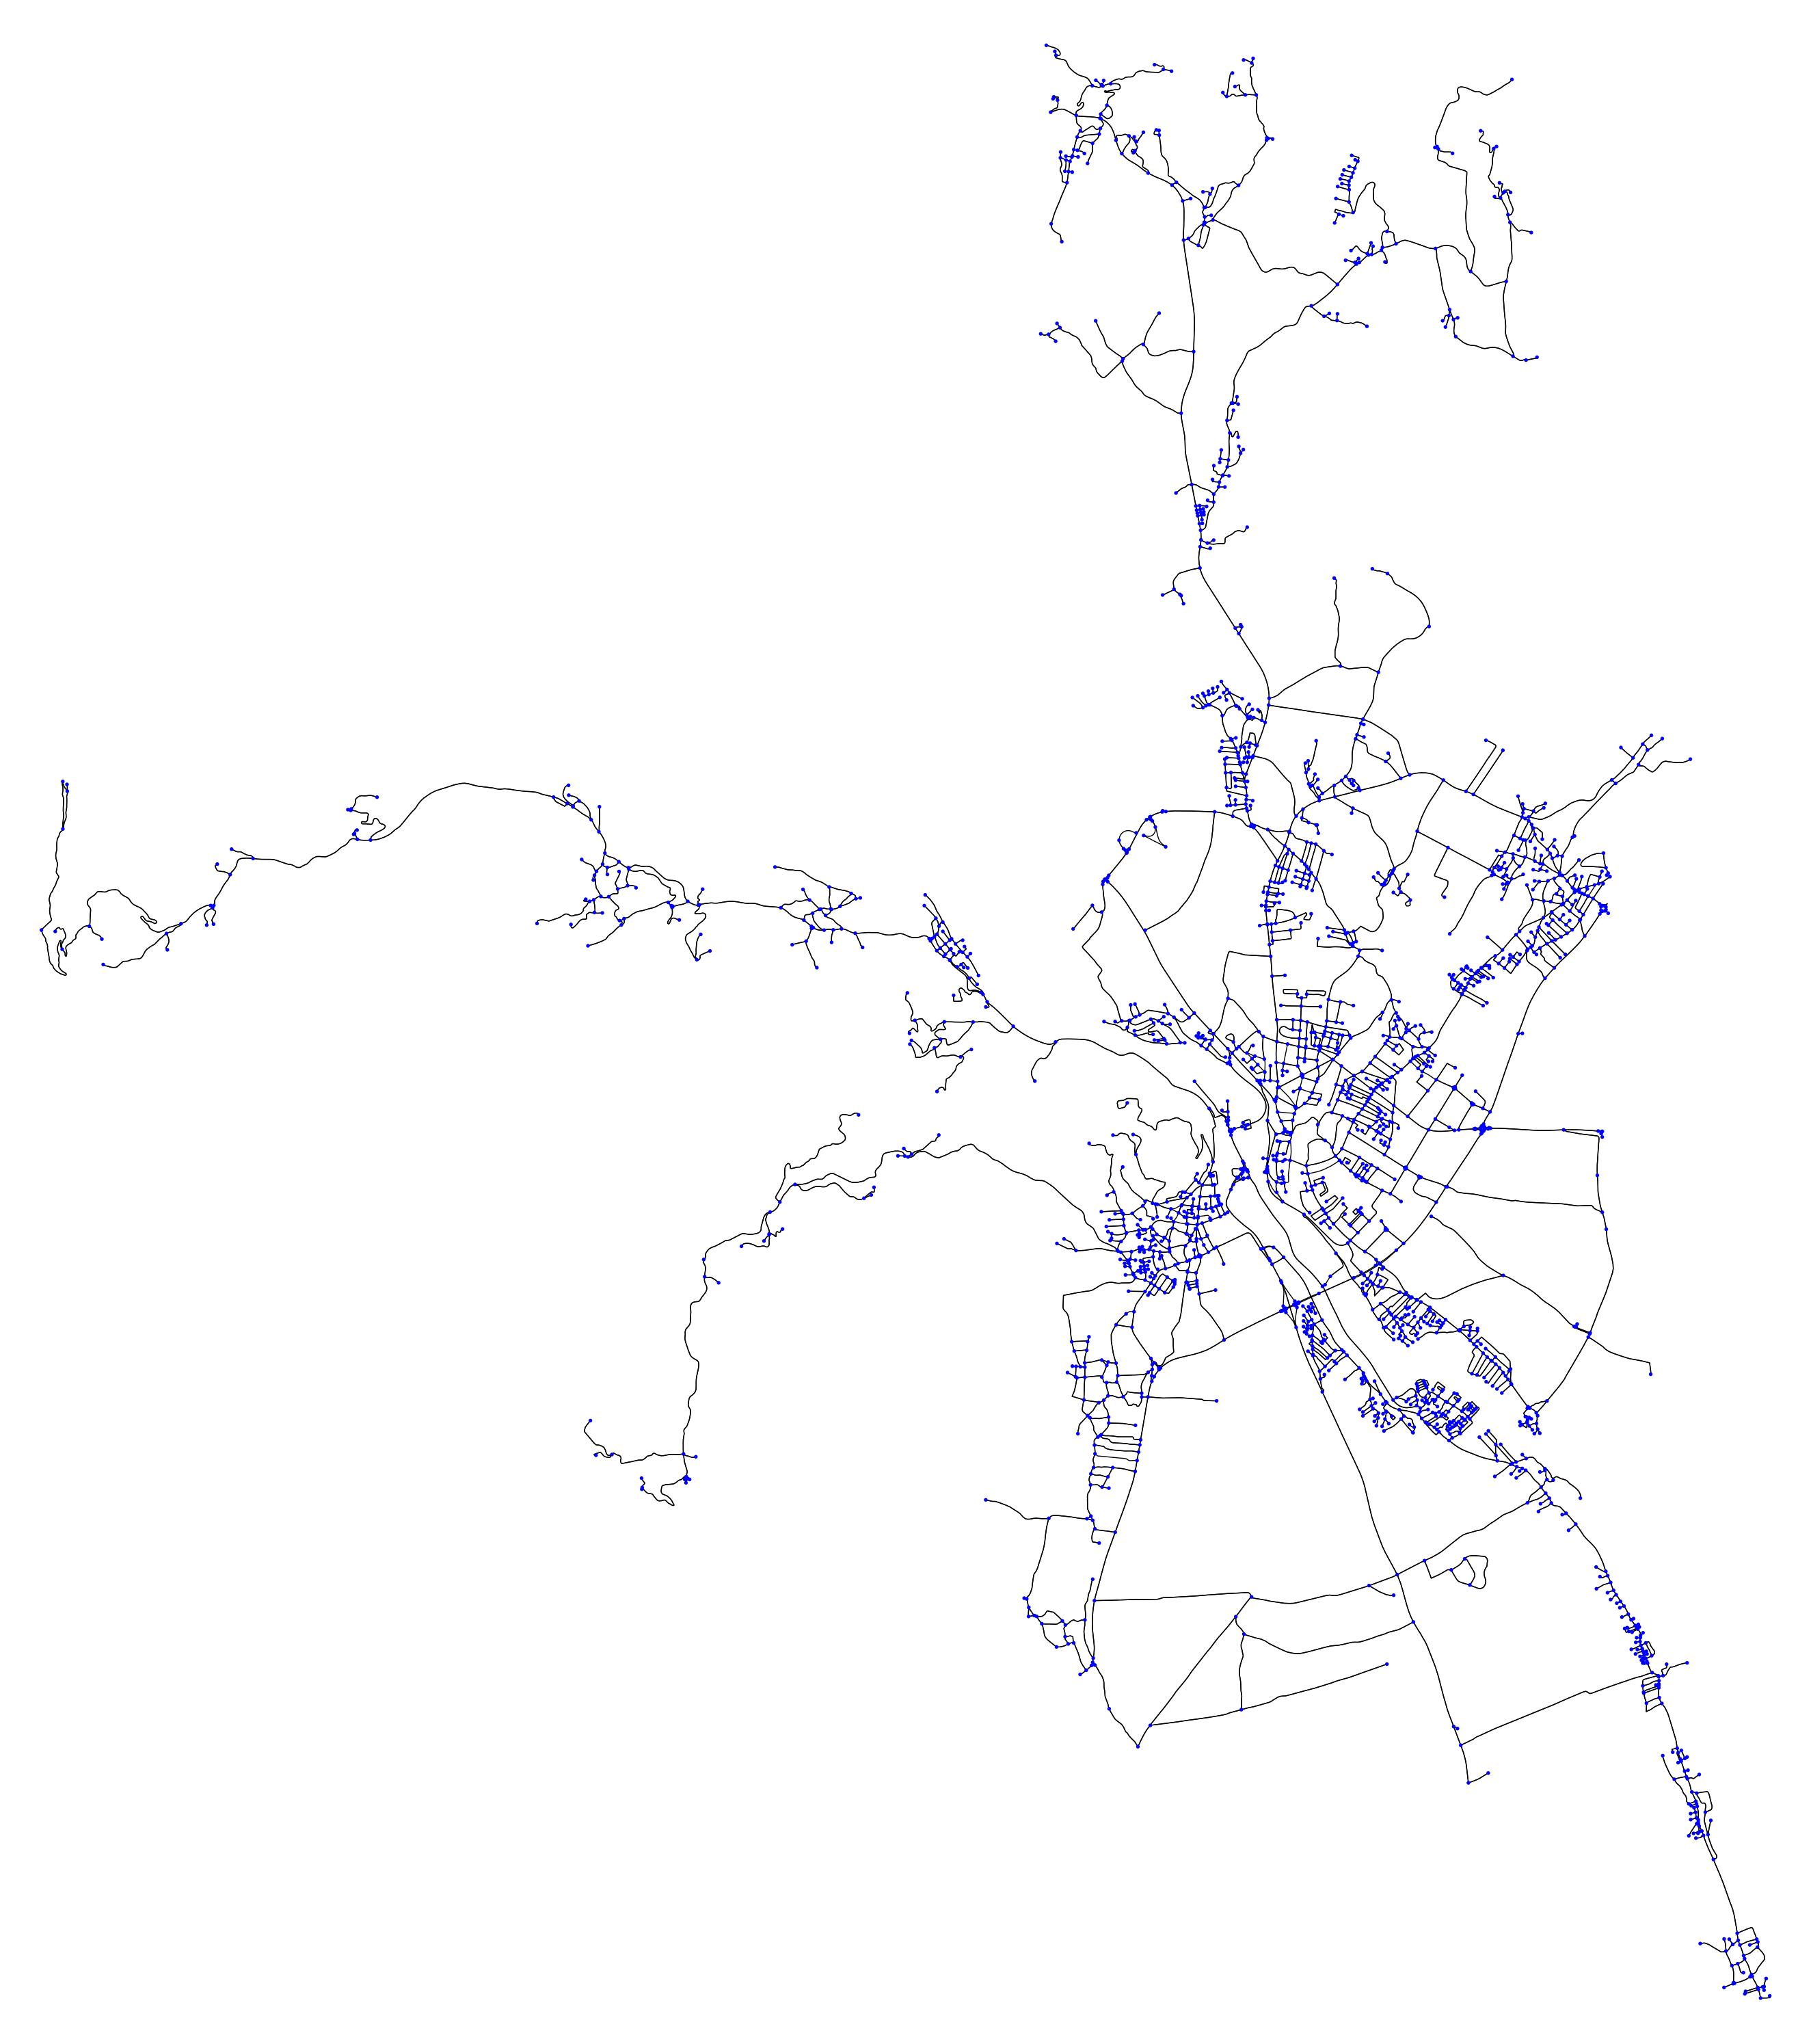

In [1]:
import osmnx as ox
import networkx as nx
PLACE_NAME = 'Kranj, Slovenia'
G = ox.graph_from_place(PLACE_NAME, network_type="drive")
fig, ax = ox.plot_graph(G, figsize=(58.33, 38.57), bgcolor='white', node_color='b', edge_color='k')
fig.savefig("./data/Kranj.png", dpi=100, pad_inches=0.0, bbox_inches='tight')

In [35]:
basic_stats = ox.basic_stats(G)
print(basic_stats)

{'n': 2401, 'm': 5614, 'k_avg': 4.6763848396501455, 'edge_length_total': 749649.8839999995, 'edge_length_avg': 133.53222016387593, 'streets_per_node_avg': 2.4643898375676803, 'streets_per_node_counts': {0: 0, 1: 720, 2: 10, 3: 1512, 4: 154, 5: 5}, 'streets_per_node_proportions': {0: 0.0, 1: 0.299875052061641, 2: 0.004164931278633903, 3: 0.6297376093294461, 4: 0.0641399416909621, 5: 0.0020824656393169513}, 'intersection_count': 1681, 'street_length_total': 382175.89399999985, 'street_segment_count': 2942, 'street_length_avg': 129.90343099932014, 'circuity_avg': 1.0880712358581832, 'self_loop_proportion': 0.002719238613188307}


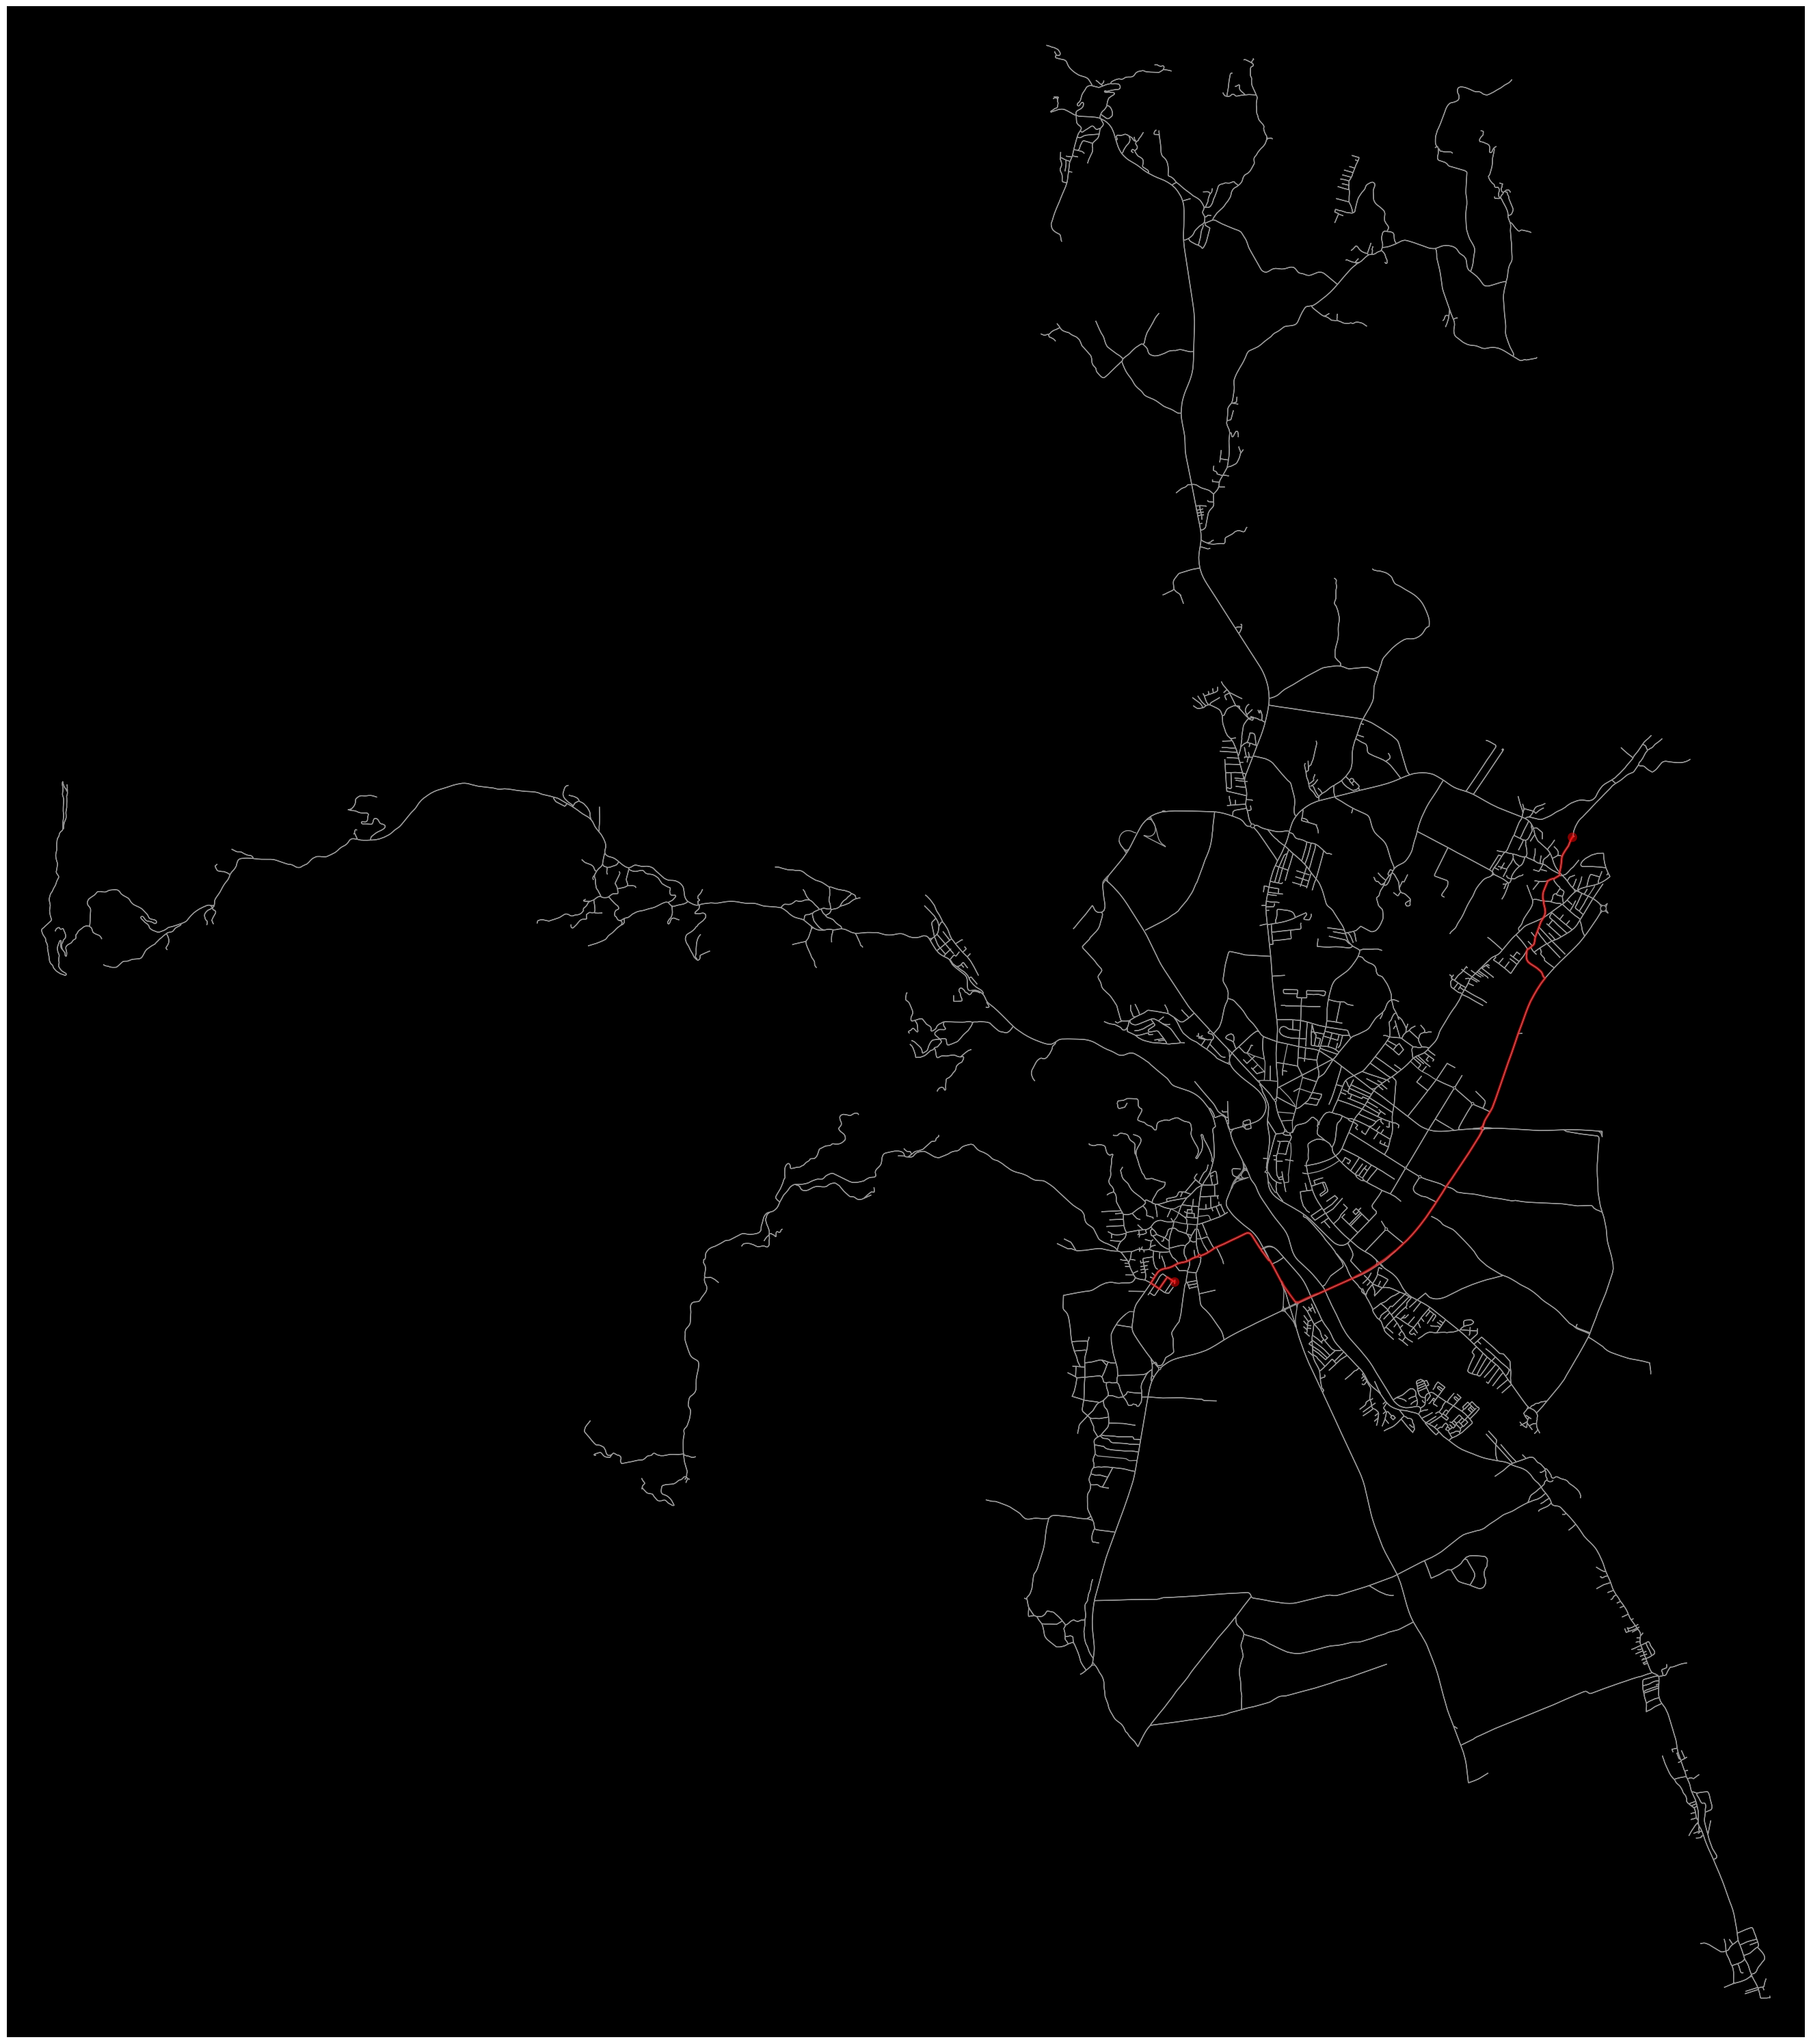

In [51]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G)[900]
dest = list(G)[246]
route = nx.shortest_path(G, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=3, node_size=0, bgcolor='k', figsize=(58.33, 38.57))

In [2]:

# impute speed on all edges missing data
G = ox.add_edge_speeds(G)

# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)
hwy_speeds = {'residential': 40,
              'secondary': 50,
              'tertiary': 60}
G = ox.add_edge_speeds(G, hwy_speeds)
G = ox.add_edge_travel_times(G)

orig = list(G)[900]
dest = list(G)[246]
route1 = nx.shortest_path(G, orig, dest, weight='length')
route2 = nx.shortest_path(G, orig, dest, weight='travel_time')

# compare the two routes
route1_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, 'length')))
route2_length = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, 'length')))
route1_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route1, 'travel_time')))
route2_time = int(sum(ox.utils_graph.get_route_edge_attributes(G, route2, 'travel_time')))
print('Route 1 is', route1_length, 'meters and takes', route1_time, 'seconds.')
print('Route 2 is', route2_length, 'meters and takes', route2_time, 'seconds.')

Route 1 is 7798 meters and takes 531 seconds.
Route 2 is 8474 meters and takes 489 seconds.


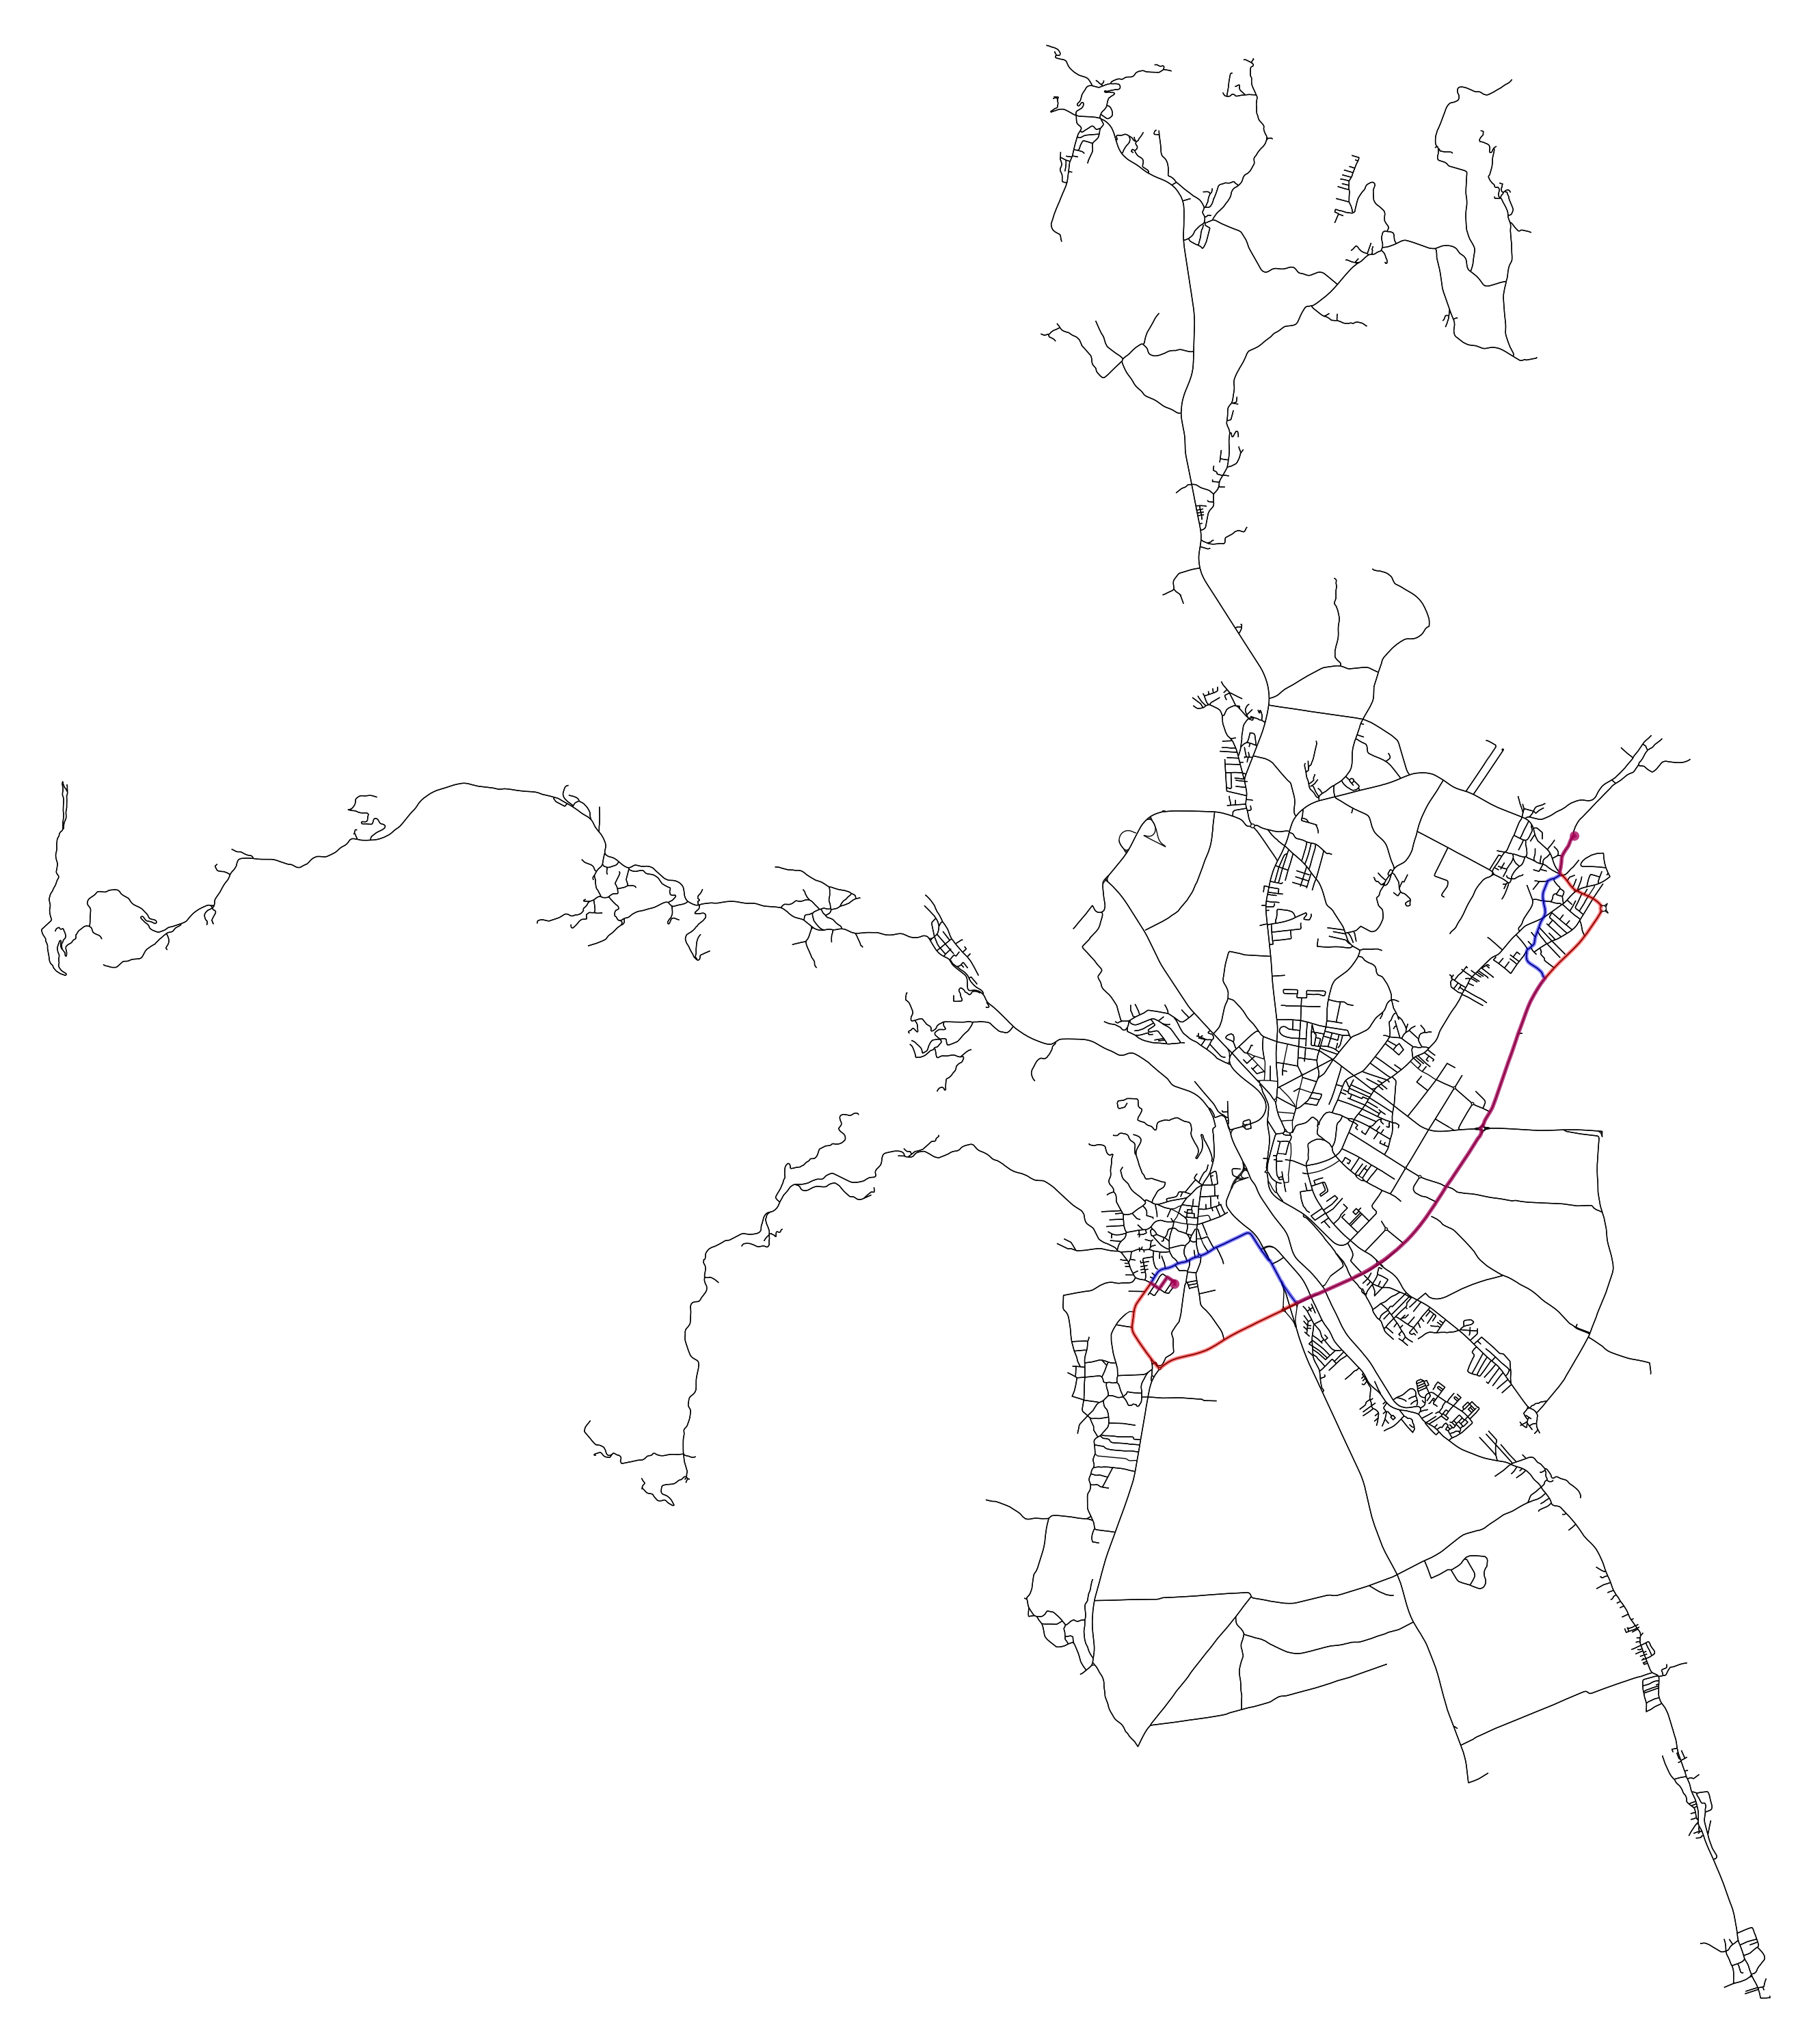

In [7]:
# plot the routes
routes = [route1, route2]
rc = ["b", "r"]
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=3, bgcolor='white', node_color='b', edge_color='k', node_size=0, figsize=(58.33, 38.57))
fig.savefig("./data/Kranj-poti.png", dpi=100, pad_inches=0.0, bbox_inches='tight')